In [30]:
#pip3 install pillow
from PIL import Image

import os, fnmatch
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd

from tensorflow.keras.applications import VGG16
from keras.layers import Dense, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, AveragePooling2D, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization,RepeatVector, LSTM

In [2]:
#img_1 = Image.open('/home/tefi/Homework/Neural_network/Fish/GloFish.jpg')
#img_2 = Image.open('/home/tefi/Homework/Neural_network/Fish/Danio-GloFish.jpg')
#img_1.show()

#image_string_1 = tf.io.read_file('/home/tefi/Homework/Neural_network/Fish/GloFish.jpg')
#image_string_2 = tf.io.read_file('/home/tefi/Homework/Neural_network/Fish/Danio-GloFish.jpg')

#image_string_1

#image_decoded_1 = tf.image.decode_jpeg(image_string_1)
#image_decoded_2 = tf.image.decode_jpeg(image_string_2)

#image_decoded

#image_decoded_1.shape

#image_resized_1 = tf.image.resize(image_decoded_1, [28, 28])

#image_resized_1.shape

In [3]:
imag = os.listdir('/home/tefi/Homework/Neural_network/Fish/')

In [4]:
PAHT_image = '/home/tefi/Homework/Neural_network/Fish/'

In [5]:
images = []
image_size = (438,655)
for i_name in imag:
  images.append(image.load_img(PAHT_image+i_name ,target_size=image_size))


In [6]:
images

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=655x438 at 0x7F1EA17DCDF0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=655x438 at 0x7F1EA17D6430>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=655x438 at 0x7F1EA17D6580>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=655x438 at 0x7F1EA17D6640>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=655x438 at 0x7F1EA17D66A0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=655x438 at 0x7F1EA17D6700>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=655x438 at 0x7F1EA17D6760>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=655x438 at 0x7F1EA17D67C0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=655x438 at 0x7F1EA17D6820>]

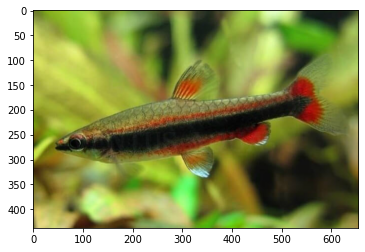

In [7]:
plt.imshow(images[0].convert('RGBA'))
plt.show()

In [8]:
data = []

for img in images:
  x = image.img_to_array(img)
  data.append(x)

data = np.array(data)

In [9]:
data.shape

(9, 438, 655, 3)

In [10]:
train_data = data[:6,:,:,:]
test_data = data[6:9,:,:,:]


In [11]:
train_data.shape, test_data.shape

((6, 438, 655, 3), (3, 438, 655, 3))

In [12]:
train_data.shape[1:]

(438, 655, 3)

In [13]:
base_model = VGG16(input_shape=(438, 655, 3), include_top=False, weights="imagenet")

In [14]:
base_out = base_model.output
base_out

<KerasTensor: shape=(None, 13, 20, 512) dtype=float32 (created by layer 'block5_pool')>

In [15]:
up = UpSampling2D(33, interpolation = 'bilinear')(base_out)
up

<KerasTensor: shape=(None, 429, 660, 512) dtype=float32 (created by layer 'up_sampling2d')>

In [16]:
model = Model(base_model.input, up)

In [17]:
pred = model.predict(train_data)

In [18]:
pred.shape

(6, 429, 660, 512)

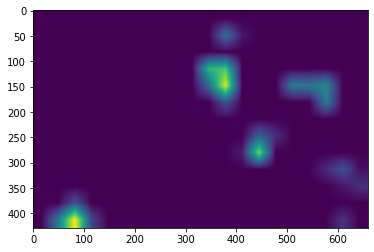

In [19]:
#plt.figure(figsize(10,10))
plt.imshow(pred[0,:,:,2])

In [34]:
conv = Conv2D(1, (1,1), activation='sigmoid')(up)

In [35]:
model = Model(base_model.input, conv)

In [36]:
pred = model.predict(train_data)

In [37]:
pred.shape

(6, 429, 660, 1)

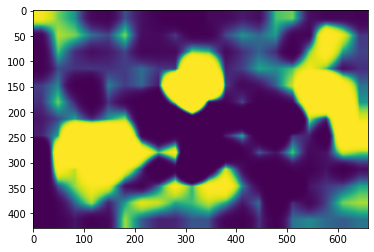

In [38]:
plt.imshow(pred[0,:,:,0])

In [39]:
model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [40]:
model_history = model.fit(train_data, epochs=5, batch_size=128, validation_data=test_data)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()